## Instructions

In [46]:
!pip install pyspark
!pip install docker

You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
import docker

In [12]:
sc = SparkSession.builder.appName('strider').getOrCreate()

### External data provided by vendor

#### Authors

In [30]:
authors = sc.read.json("data-dump\\authors.json")
authors.show(5)


+--------------------+--------------------+--------------+-----------------+
|          birth_date|             died_at|          name|      nationality|
+--------------------+--------------------+--------------+-----------------+
|1956-05-07T00:00:...|                null| Josh Johnston|Guianese (French)|
|2000-06-30T00:00:...|2042-08-07T00:00:...|     Al Hamill|        Armenians|
|1975-12-07T00:00:...|2049-02-24T00:00:...|Wilmer Reichel|        Andorrans|
|1930-07-14T00:00:...|1982-04-14T00:00:...| Garland Lynch|     Singaporeans|
|1967-02-25T00:00:...|1994-01-01T00:00:...|Napoleon Terry|          Kenyans|
+--------------------+--------------------+--------------+-----------------+
only showing top 5 rows



#### Books

In [32]:
books = sc.read.json("data-dump\\books.json")
books.show(5)

+--------------------+--------------------+-----+-------------------+
|              author|                name|pages|          publisher|
+--------------------+--------------------+-----+-------------------+
|    Ms. Dorsey Grant|    An Evil Cradling| 6302|Harcourt Assessment|
|     Alexa Dickinson|      As I Lay Dying| 8934|     Pavilion Books|
|  Eneida Considine V|    Recalled to Life| 8195| Sidgwick & Jackson|
|       Darcie Abbott|      The Waste Land| 8608|     Left Book Club|
|Salvatore Herman PhD|Bury My Heart at ...| 6376|        Cisco Press|
+--------------------+--------------------+-----+-------------------+
only showing top 5 rows



#### Reviews

In [33]:
reviews = sc.read.json("data-dump\\reviews.json")
reviews.show(5)

+------------------+--------------------+----+--------------------+
|              book|               movie|rate|              resume|
+------------------+--------------------+----+--------------------+
|A Passage to India|Beauty and the Beast|   1|Solitudo magnam v...|
|    The Man Within|Star Wars: Episod...|   5|Adhuc ad velum. C...|
|       Vanity Fair|    The Big Lebowski|   1|Tersus velit asse...|
|The Moving Toyshop|        Mary and Max|   5|Pecco quis magni....|
|     Endless Night|   L.A. Confidential|   3|Tyrannus audio au...|
+------------------+--------------------+----+--------------------+
only showing top 5 rows



### Internal data

#### Users

In [29]:
users = sc.read.csv("data-dump\\users.csv",header=True)
users.show(5)


+----------+---------+--------------------+
|first_name|last_name|               email|
+----------+---------+--------------------+
|      Eddy|   Kirlin|karine@bode-rogah...|
|     Elvia|     Conn|janet_haag@crist.biz|
|   Ezekiel|    Block|    landon@bauch.org|
|      Hugh| Nikolaus|grover_terry@metz...|
|      Iona|    Huels|  clelia@wuckert.com|
+----------+---------+--------------------+
only showing top 5 rows



#### Movies

In [21]:
movies = sc.read.csv("data-dump\\movies.csv",header=True)
movies.show(5)


+----------------+-------------+-----------------+-------+
|           title|duration_mins|original_language|size_mb|
+----------------+-------------+-----------------+-------+
|The Great Escape|          113|           Korean|    876|
|   The Third Man|          129|           French|   1857|
| Cinema Paradiso|          102|          Russian|    676|
|        Scarface|          112|         Japanese|   1236|
|         Vertigo|          146|          Italian|    649|
+----------------+-------------+-----------------+-------+
only showing top 5 rows



#### Streams

In [22]:
streams = sc.read.csv("data-dump\\streams.csv",header=True)
streams.show(5)

+--------------------+--------------------+------------------+--------------------+--------------------+
|         movie_title|          user_email|           size_mb|            start_at|              end_at|
+--------------------+--------------------+------------------+--------------------+--------------------+
|   Full Metal Jacket|rodrick_bergnaum@...| 613.4245936603365|2021-12-06T19:30:...|2021-12-07T15:44:...|
|                Rush|nolan.wintheiser@...|  330.524118447188|2021-12-15T04:36:...|2021-12-15T05:57:...|
|Star Wars: Episod...|willie.baumbach@d...| 2101.559005489579|2021-12-12T22:32:...|2021-12-13T20:37:...|
|The Bridge on the...|catalina_rath@jon...|1988.0439476360807|2021-12-04T20:47:...|2021-12-05T07:13:...|
|            3 Idiots|lowell.keeling@be...| 625.9428853440369|2021-12-25T14:27:...|2021-12-26T00:22:...|
+--------------------+--------------------+------------------+--------------------+--------------------+
only showing top 5 rows



### **Phase 1** 
Build an Extract, Transform, Load (ETL) pipeline that will take this data and move it into a production-ready database that can be easily queried to answer questions for the business.


**Solution 2**: I will create spark temporary views to query the data. Using this resource I don't need to storage anything in some database to be able to query the data

#### **Solution 1**: Creating database and tables in Mysql using a container

In [ ]:
client = docker.from_env()
client.volumes.create(name='mysql-volume')
client.containers.run('mysql/mysql-server:8.0.20',\
                      name='strider-mysql',\
                      ports={3306:3306},\
                      volumes=['mysql-volume:/var/lib/mysql'],\
                      environment={'MYSQL_ROOT_PASSWORD':'123456'})




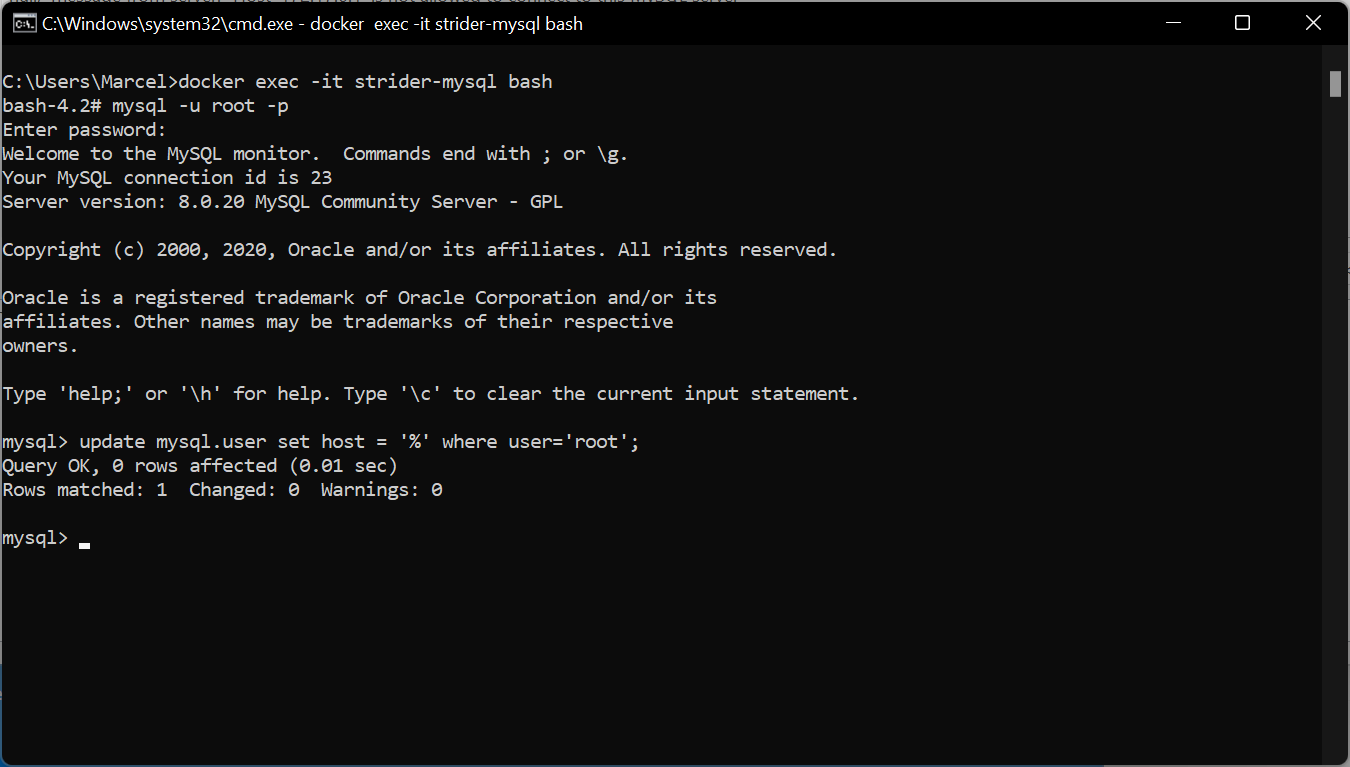

#### **Solution 2**: Using Spark Sql to run queries

In [43]:
authors.createOrReplaceTempView('authors')
books.createOrReplaceTempView('books')
reviews.createOrReplaceTempView('reviews')

users.createOrReplaceTempView('users')
movies.createOrReplaceTempView('movies')
streams.createOrReplaceTempView('streams')